In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('temperatures.csv')

In [3]:
# Function to apply linear regression for a specific month
def linear_regression_for_month(month):
    X = data[['YEAR']].values  # Independent variable (year)
    y = data[month].values     # Dependent variable (temperature for the month)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f'Linear Regression for {month} Temperatures')
    plt.xlabel('Year')
    plt.ylabel(f'{month} Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, mse, mae, r2

In [4]:
# Function to apply linear regression for a specific month (without plotting)
def train_model_for_month(month):
    X = data[['YEAR']].values  # Independent variable (year)
    y = data[month].values     # Dependent variable (temperature for the month)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    return model

In [5]:
# Function to predict temperature for a specific month and year (without plotting)
def predict_temperature_for_month(month, year):
    model = train_model_for_month(month)  # Train the model for the month
    prediction = model.predict(np.array([[year]]))  # Predict for the given year
    return prediction[0]

In [6]:
# List of months to apply linear regression
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

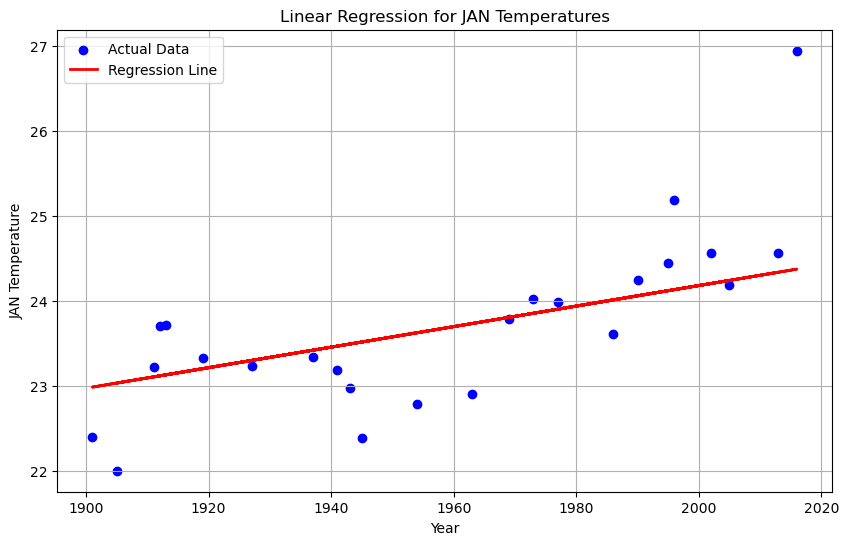

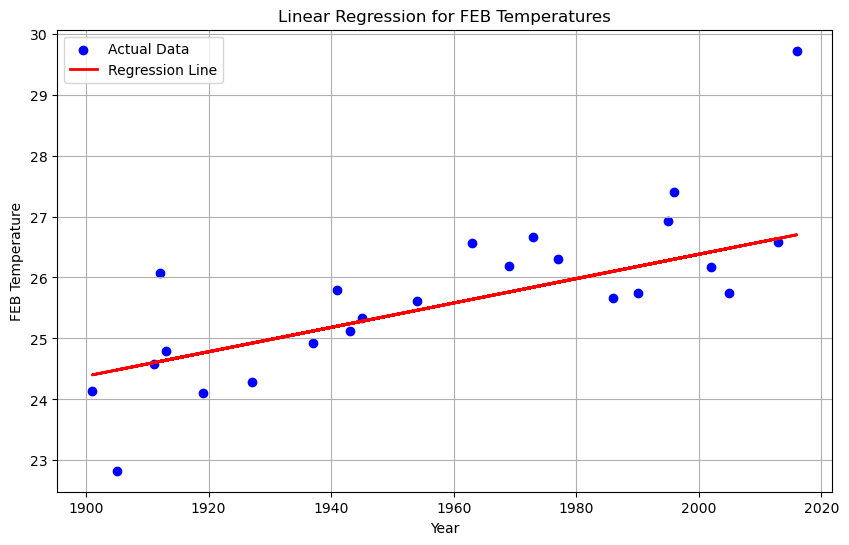

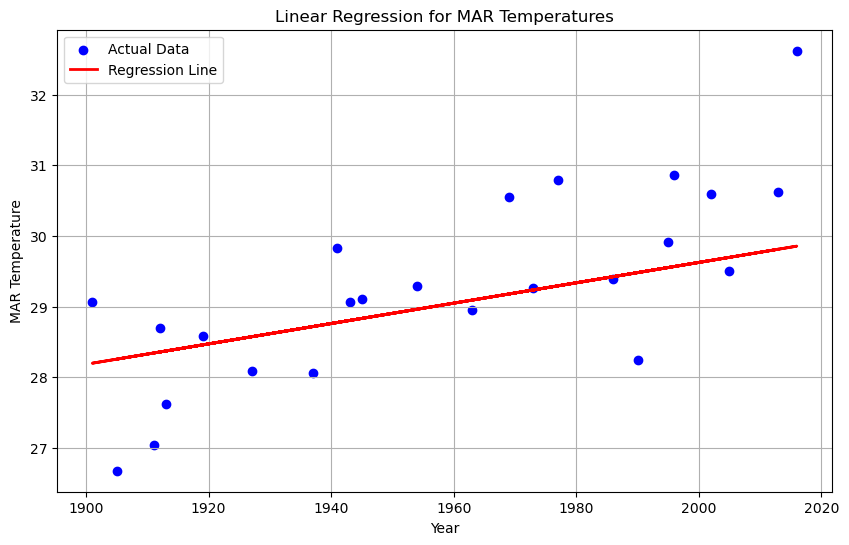

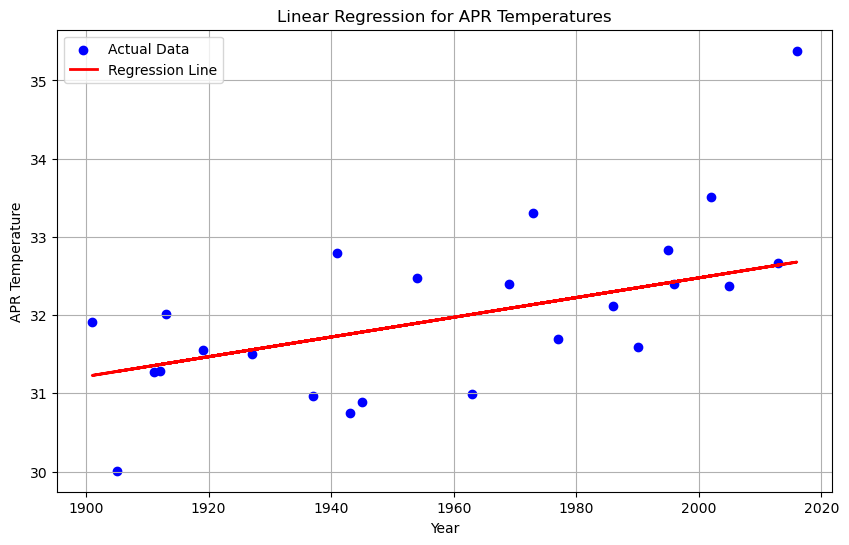

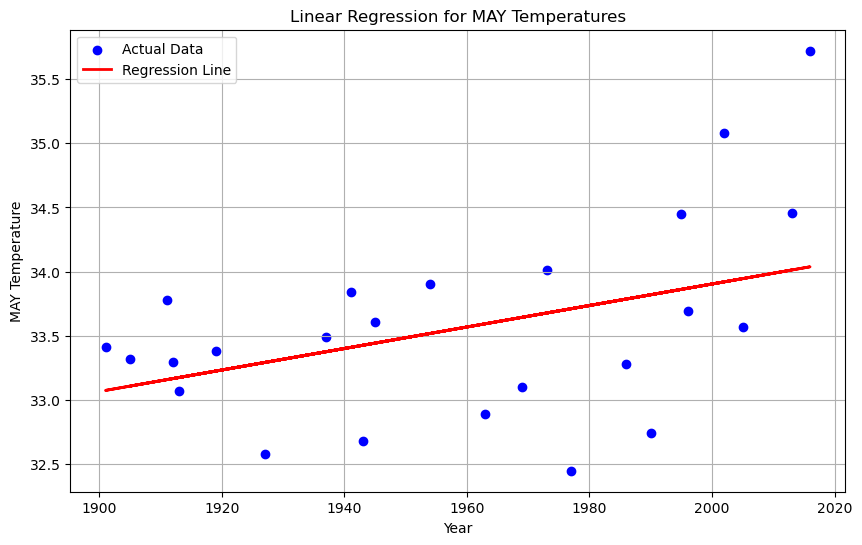

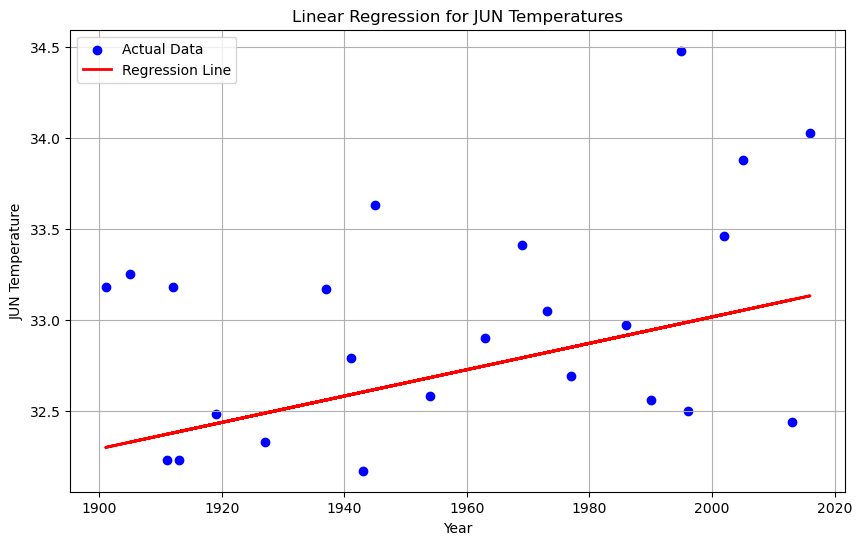

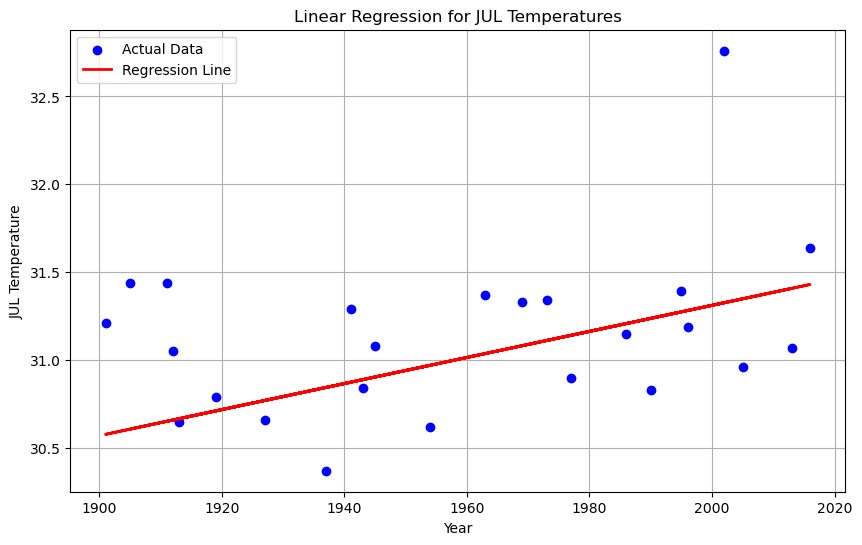

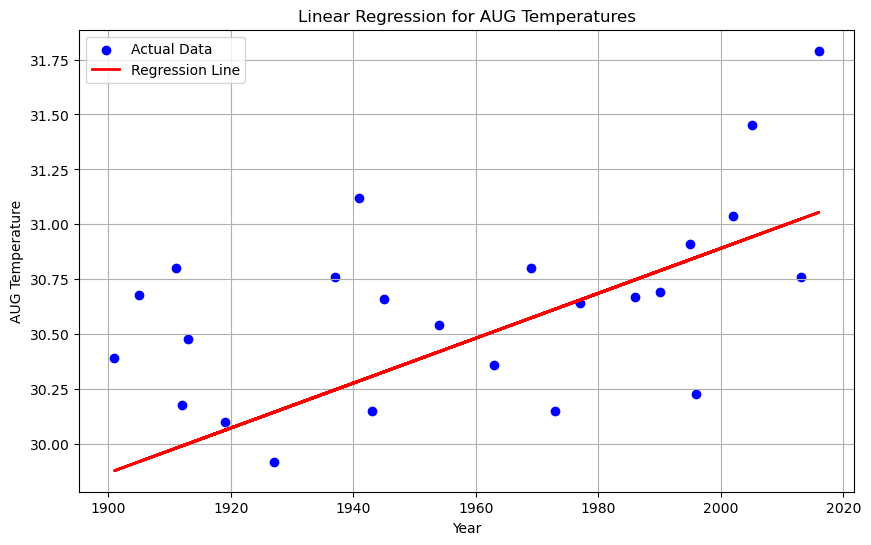

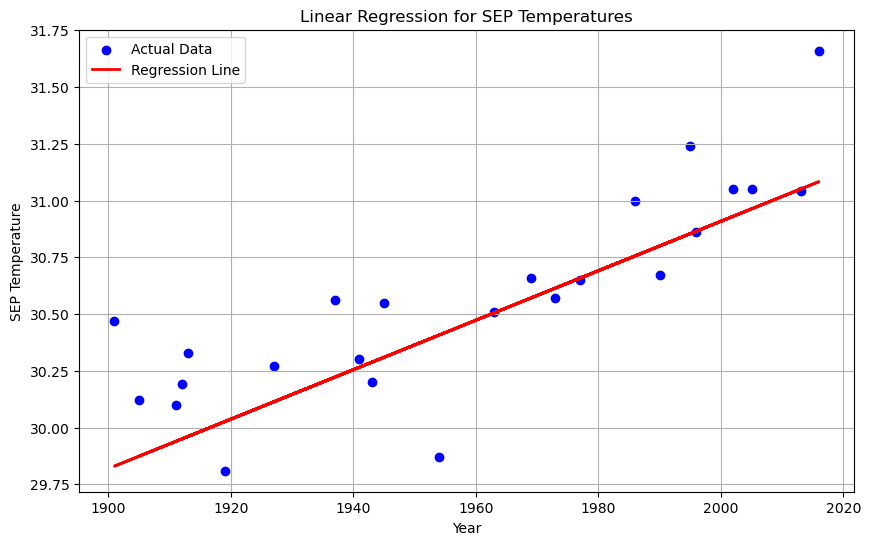

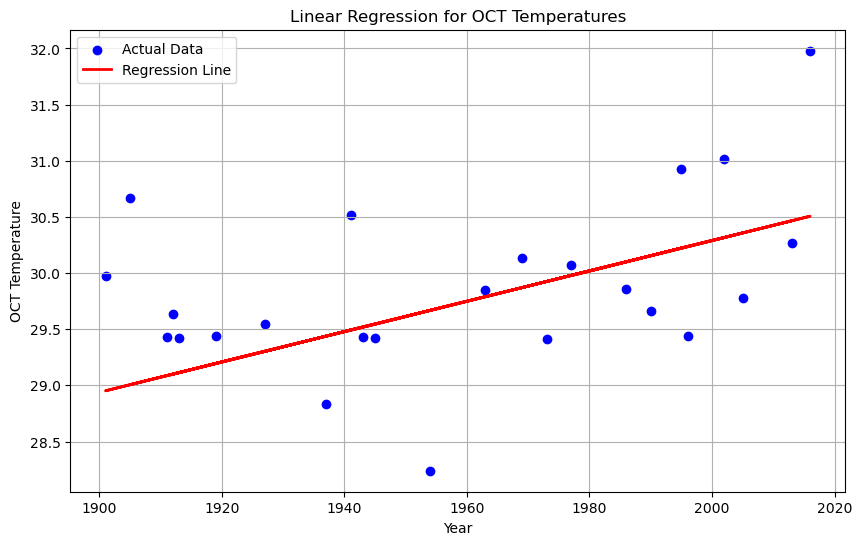

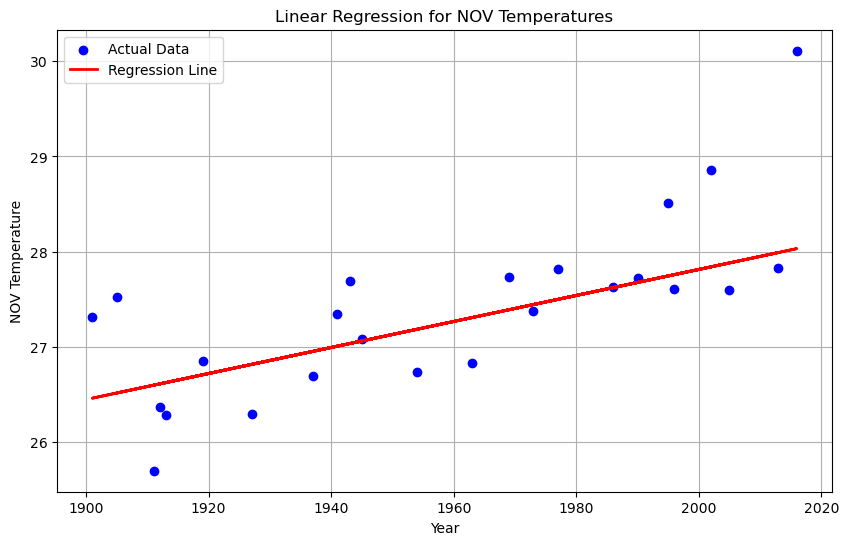

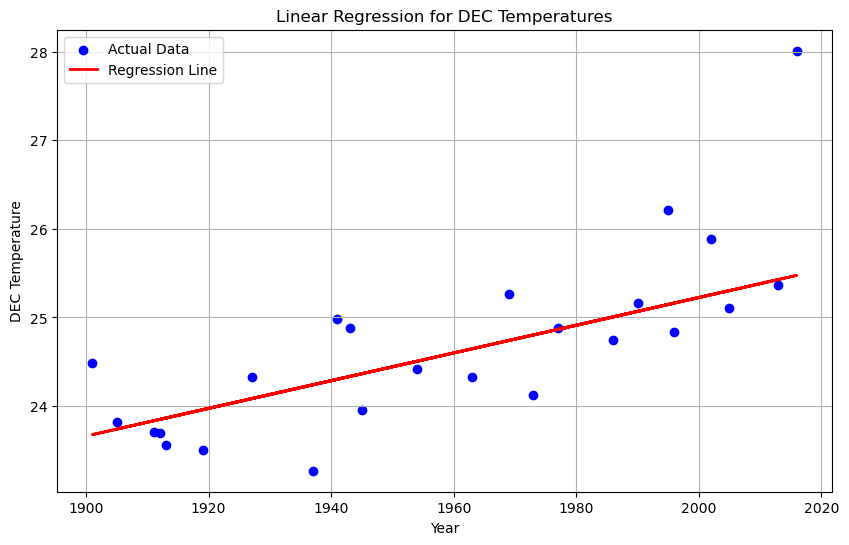

In [7]:
# Apply linear regression for each month and store performance metrics
performance_metrics = {}
for month in months:
    model, mse, mae, r2 = linear_regression_for_month(month)
    performance_metrics[month] = {'MSE': mse, 'MAE': mae, 'R-Squared': r2}

In [8]:
# Display the performance metrics for all months
for month, metrics in performance_metrics.items():
    print(f"Performance for {month}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.4f}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.4f}")
    print(f"  R-Squared: {metrics['R-Squared']:.4f}")
    print()

Performance for JAN:
  Mean Squared Error (MSE): 0.5568
  Mean Absolute Error (MAE): 0.5084
  R-Squared: 0.4601

Performance for FEB:
  Mean Squared Error (MSE): 0.8244
  Mean Absolute Error (MAE): 0.6322
  R-Squared: 0.5338

Performance for MAR:
  Mean Squared Error (MSE): 1.0140
  Mean Absolute Error (MAE): 0.7784
  R-Squared: 0.4119

Performance for APR:
  Mean Squared Error (MSE): 0.7575
  Mean Absolute Error (MAE): 0.6435
  R-Squared: 0.3608

Performance for MAY:
  Mean Squared Error (MSE): 0.4518
  Mean Absolute Error (MAE): 0.5405
  R-Squared: 0.2166

Performance for JUN:
  Mean Squared Error (MSE): 0.3846
  Mean Absolute Error (MAE): 0.4951
  R-Squared: -0.0691

Performance for JUL:
  Mean Squared Error (MSE): 0.2201
  Mean Absolute Error (MAE): 0.3505
  R-Squared: -0.0513

Performance for AUG:
  Mean Squared Error (MSE): 0.1879
  Mean Absolute Error (MAE): 0.3472
  R-Squared: -0.0313

Performance for SEP:
  Mean Squared Error (MSE): 0.0759
  Mean Absolute Error (MAE): 0.2071
 

In [9]:
# Example: Predict temperature for January (month='JAN') for the year 2025
month = 'JAN'
year = 2025
predicted_temp = predict_temperature_for_month(month, year)

print(f"Predicted temperature for {month} in {year}: {predicted_temp:.2f}°C")

Predicted temperature for JAN in 2025: 24.62°C
